## 1.1 Ordinary Least Squares
- LinearRegression은 데이터 셋에서 관측된 목표치와 예상값의 잔차를 최소화하는 선형적 모델을 그리기 위해 필요하다.

### 개념

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
reg.coef_ #예상한 계수

array([0.5, 0.5])

### 예제

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients:  [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


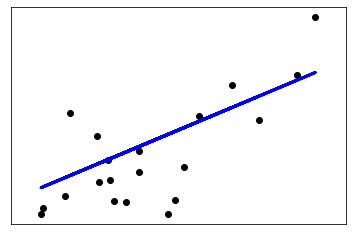

In [9]:
# 데이터 부르기
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 한가지 특징만 사용하기
diabetes_X = diabetes_X[:, np.newaxis, 2]

# training과 testing sets 구분하기
diabetes_X_train = diabetes_X[: -20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# 모델링하기
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# 함수와 같다. y=f(x) 와 같이 x를 input 하면 output인 y가 나옴
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'% r2_score(diabetes_y_test, diabetes_y_pred))

plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### 1.2 Ridge regression and classification
- 기존 최소 제곱법으로 발생했던 문제들을 줄이기 위해 계수의 크기를 넣어 제한해 잔차가 가장 작은 값을 찾으려 했던 것이다. 이 때 alpha 라는 값을 변수로 두어 alpha 값이 커지면 감소 폭도 커지는 것을 말한다. 

### Ridge regression 개념

In [1]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [2]:
reg.coef_

array([0.34545455, 0.34545455])

In [3]:
reg.intercept_

0.1363636363636364

### Ridge Classification 개념
- Ridge 회귀는 RidgeClassifier라는 변수를 가지고 있다. 이것을 사용해서 전통적인 로직이나 힌지 loss 대신에 분류 모델에 적용한 다는 것에 의문이 있을 수 있다. 하지만 실제로 모든 모델들이 정확성이나 정확도에 관해 비슷한 cross-validation 점수로 결과를 내고 RidgeClassifier는 다른 선택지를 주어 계산을 할 수 있게 한다.

### 예제 
- Plot Ridge coefficients as a function of the regularization

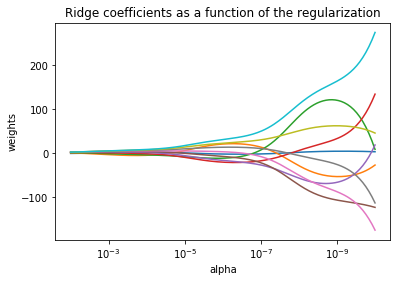

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 1.3 Lasso Regression
- Lasso는 부족한 계수들을 가진 선형 모델을 다루는데 좋다. 해결책이 특징 수를 효율적으로 줄이는데 의존적이라 적은 계수들을 가진 해결책을 도출하려는 경향이 있다. 이런 이유로 Lasso는 압축된 감지 체계에 근본적을 두고 있다. 그래서 수학적 계수 앞에 1/2n이 곱해져 있음

### 개념

In [1]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [2]:
reg.predict([[1, 1]])

array([0.8])

### 예제
- Lasso and Elastic Net for Sparse Signals

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data: 0.658064
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.642515


Text(0.5, 1.0, 'Lasso $R^2$: 0.658, Elastic Net $R^2$: 0.643')

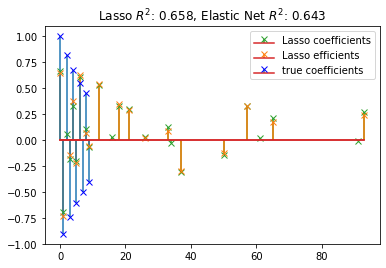

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

idx = np.arange(n_features)
coef = (-1)**idx*np.exp(-idx/10)
coef[10:] = 0
y=np.dot(X, coef)

y += 0.01 * np.random.normal(size=n_samples)

n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data: %f" % r2_score_lasso)

from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                  markerfmt='x', label='Lasso coefficients',
                  use_line_collection=True)
plt.setp([m, s], color='#2ca02c')
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                  markerfmt='x', label='Lasso efficients',
                  use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
        markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
         % (r2_score_lasso, r2_score_enet))

### 1.4 Multi-Task Lasso

### 예제
- Joint feature selection with mult-task Lasso
- 많은 회귀 문제들이 같은 일들이 되도록 선택된 features들을 강화하는데 사용 된다.

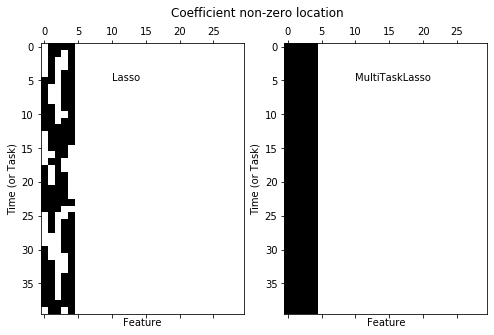

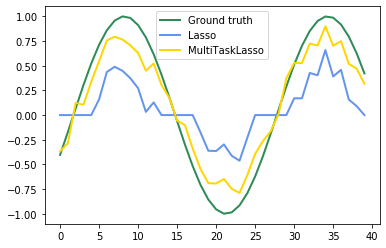

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2*np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3*rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw=2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
        label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
        label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
        label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

### 1.10 Bayesian Regression
- 이 기술은 정규화 인자들을 연산과정에 포함하는데 의미가 있다.

### 개념

In [1]:
from sklearn import linear_model
X = [[0, 0], [1, 1], [2, 2], [3, 3]]
Y = [0, 1, 2, 3]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [2]:
reg.predict([[1, 0]])

array([0.50000013])

In [3]:
reg.coef_

array([0.49999993, 0.49999993])

### 예제
- Bayesian Ridge Regression

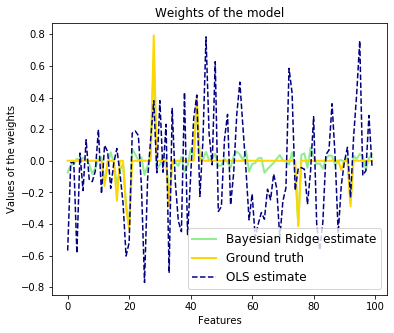

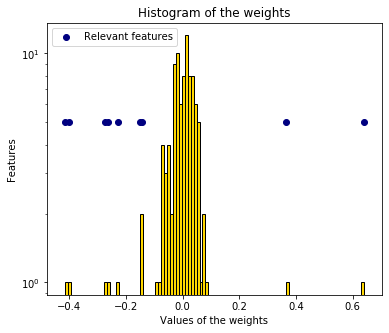

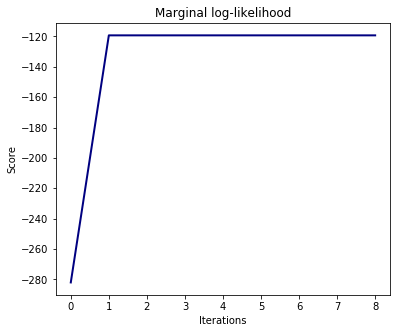

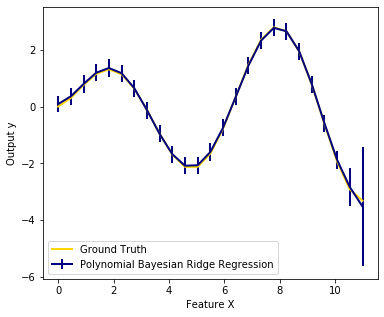

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)
lambda_ = 4.
w = np.zeros(n_features)

relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
y = np.dot(X, w) + noise

clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

### 1.11 Logistic Regression

### 개념

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [6]:
clf.predict_proba(X[:2, :])

array([[9.81796729e-01, 1.82032562e-02, 1.44268498e-08],
       [9.71724746e-01, 2.82752243e-02, 3.01656728e-08]])

In [7]:
clf.score(X, y)

0.9733333333333334

### 예제
- Logistic function

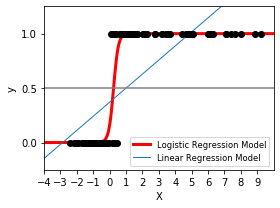

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X=np.random.normal(size=n_samples)
y=(X>0).astype(np.float)
X[X>0] *= 4
X += .3 * np.random.normal(size=n_samples)

X=X[:, np.newaxis]

clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

### 1.17 Polynomial Regression
- 다중선형회귀 분석은 도출하고자 하는 데이터의 특성이 한개가 아닌 여러 차원의 요소로 이루어졌을 때 사용한다.

### 개념

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [6]:
# 여기서 degree=2 라는 것은 x1, x2 2개이고 상수, x1, x2, x1*x2, x1^2, x2^2 이렇게 나옴
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])
x=np.arange(5)
y=3-2*x+x**2-x**3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X=np.array([[0,0], [0,1], [1,0], [1,1]])
y=X[:, 0]^X[:, 1]
y

array([0, 1, 1, 0])

In [13]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]])

In [14]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
...                  shuffle=False).fit(X, y)

In [15]:
clf.predict(X)

array([0, 1, 1, 0])

In [16]:
clf.score(X, y)

1.0

### 예제
- Polynomial interpolation

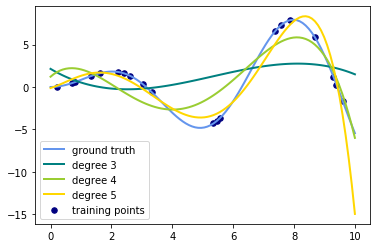

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    return x * np.sin(x)

x_plot = np.linspace(0, 10, 100)

x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[: 20])
y = f(x)

X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
        label='ground truth')
plt.scatter(x, y,color='navy', s=30, marker='o', label='training points')

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
            label='degree %d' % degree)
    
plt.legend(loc='lower left')
plt.show()